In [1]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import cv2
from training_functions import *
from testing_functions import *

In [2]:
### This is the main script! 
### Dataloading, training, testing

# Set training hyperparameters here
class_num = 3


In [3]:
## Data-loading
# Load from Matlab
mat_contents = io.loadmat('cups_data_{}class.mat'.format(class_num))
mat_data = mat_contents['data']
sample_num = mat_data.shape[1]
data = np.zeros([sample_num,900*1200,4])
for i in range(sample_num):
    data[i] = mat_data[0][i].astype(dtype=int)
    
# Split into Train & Test
train_num = round(sample_num*0.8)
test_num = sample_num - train_num
train_index = np.sort(np.random.choice(sample_num, train_num, replace=False))
test_index = np.delete(np.arange(sample_num),train_index)
train_data = data[train_index]
test_data = data[test_index]

In [4]:
## Train
class_objs = []
class_objs = computeGaussian(train_data, class_num)

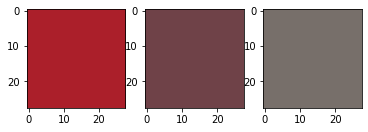

In [5]:
#### show class colors
# (1)red cup (2)dark red (3)others (4)brick red (5)pink
f, ax = plt.subplots(1,class_num)
for i in range(class_num):
    mean = class_objs[i].mean
    img = ((np.ones([28,28]))[:,:,np.newaxis]*mean).astype('int')
    ax[i].imshow(img)
    
plt.show()

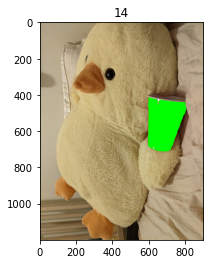

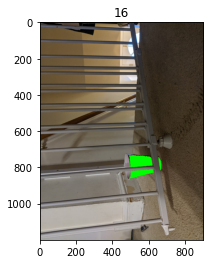

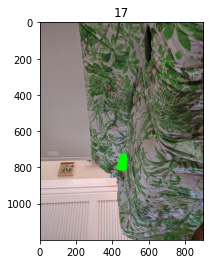

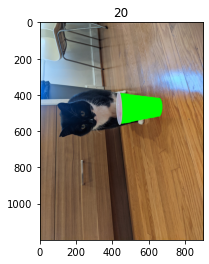

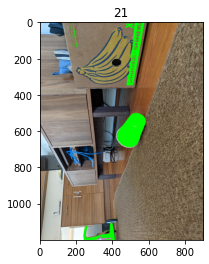

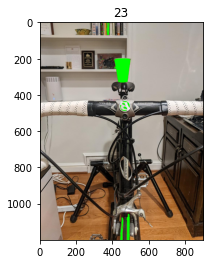

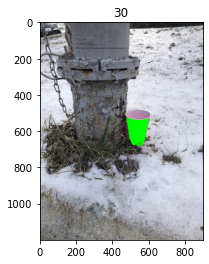

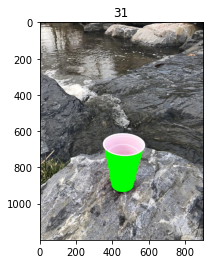

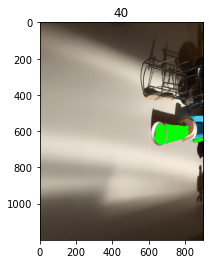

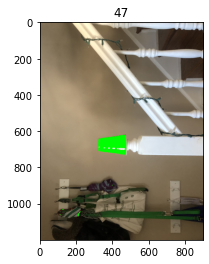

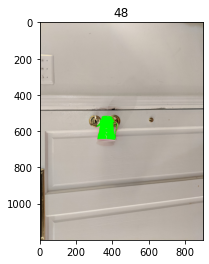

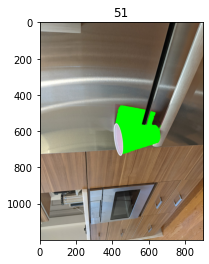

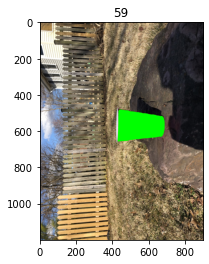

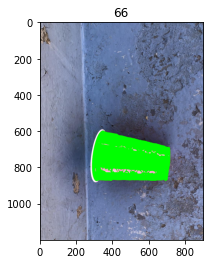

In [6]:
## Testing
estimates_allimages = []
binary_images = []

estimates_allimages = getPixelEstimates(test_data, class_num, class_objs)
binary_images = showGreenImages_getBinaryImages(test_data, test_index, estimates_allimages)

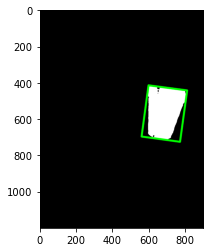

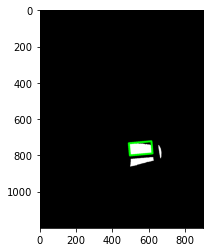

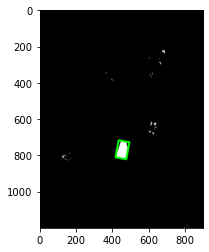

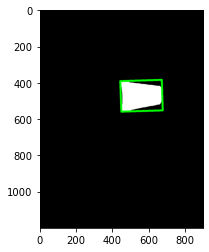

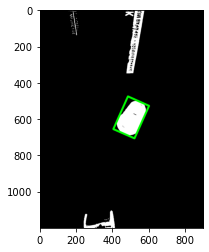

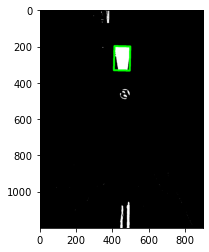

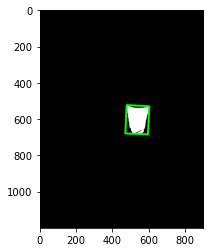

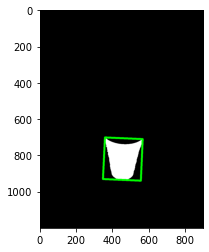

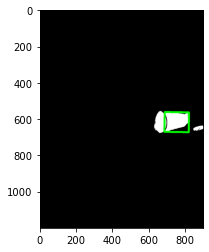

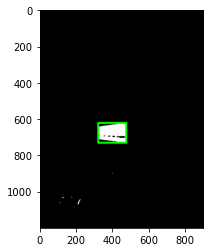

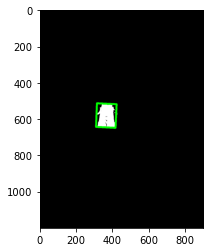

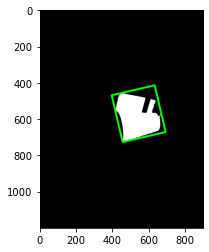

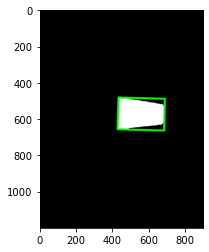

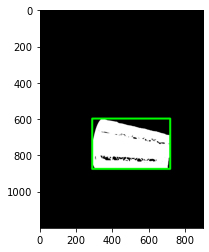

In [7]:
showBoundingBox(binary_images)